In [2]:
import numpy as np
import matplotlib.pyplot as plt

Signal Parameters (from the example)

In [3]:
sampling_rate = 1000  # Hz
T = 1.0  # seconds
N = int(sampling_rate * T)
t = np.linspace(0, T, N, endpoint=False)

Signal with two frequencies: 50 Hz and 120 Hz (from the example)


In [4]:
freq1 = 50
freq2 = 120
signal = np.sin(freq1 * 2 * np.pi * t) + 0.5 * np.sin(freq2 * 2 * np.pi * t)

Add noise (same as Exercise 1)

In [5]:
noise = 0.2 * np.random.randn(N)
noisy_signal = signal + noise

Step 1: Take the FFT of the noisy signal

In [6]:
noisy_fft = np.fft.fft(noisy_signal)

Step 2: Zero out the noise by setting small magnitude values to zero
Choose a threshold (e.g., 0.1; adjust based on your signal's magnitude scale)

In [7]:
threshold = 0.1 * np.max(np.abs(noisy_fft))  # Relative to max for robustness
filtered_fft = noisy_fft.copy()
filtered_fft[np.abs(filtered_fft) < threshold] = 0

Step 3: Apply the Inverse FFT

In [8]:
filtered_signal = np.real(np.fft.ifft(filtered_fft))  # Take real part for real-valued signal

Step 4: Plot the resulting time-domain signal

In [9]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Plot the original noisy signal for comparison

Text(0, 0.5, 'Amplitude')

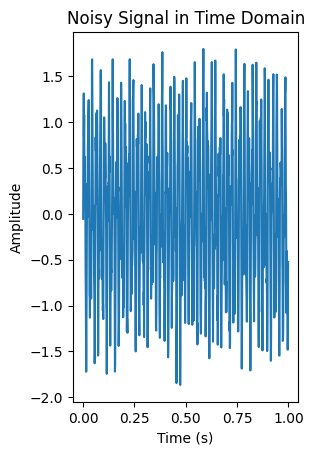

In [10]:
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Plot the filtered signal

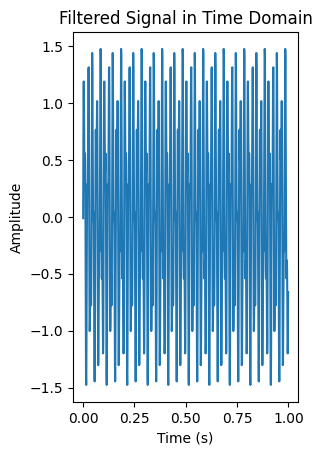

In [11]:
plt.subplot(1, 2, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()